<img src="fireblaze.jpg" width=250 height=200 />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')

In [3]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
X = df.iloc[:,[2,3]].values

In [8]:
X.shape

(200, 2)

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)


E:\Anacons\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21850.165282585636, 19672.07284901432]


E:\Anacons\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


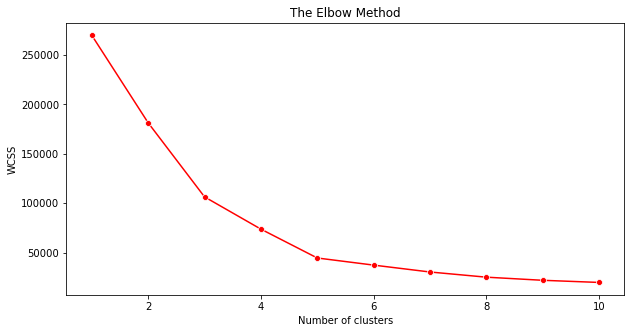

In [11]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker='o', color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [12]:
fig.savefig('elbow_method.png')
plt.close(fig)

In [13]:
#fitting

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X)

In [14]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

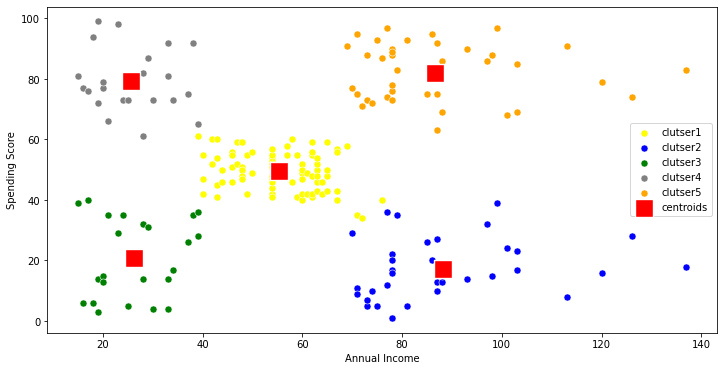

In [15]:
#visualisuing the clusters
plt.figure(figsize=(12,6))

sns.scatterplot(data = X, x = X[y_means==0,0],y = X[y_means==0,1], color='yellow', label='clutser1',s=50)
sns.scatterplot(data = X, x = X[y_means==1,0],y = X[y_means==1,1], color='blue', label='clutser2',s=50)
sns.scatterplot(data = X, x = X[y_means==2,0],y = X[y_means==2,1], color='green', label='clutser3',s=50)
sns.scatterplot(data = X, x = X[y_means==3,0],y = X[y_means==3,1], color='grey', label='clutser4',s=50)
sns.scatterplot(data = X, x = X[y_means==4,0],y = X[y_means==4,1], color='orange', label='clutser5',s=50)

sns.scatterplot(data=X,x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='red',label='centroids', s=300, marker=',')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


# hierarchical Clustering

In [16]:
dataset = pd.read_csv('Mall_Customers.csv')

In [17]:
dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# X = dataset.iloc[:,[3,4]]
X=dataset[['Annual_Income_(k$)','Spending_Score']].values

In [19]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [20]:
import scipy.cluster.hierarchy
from scipy.cluster import hierarchy

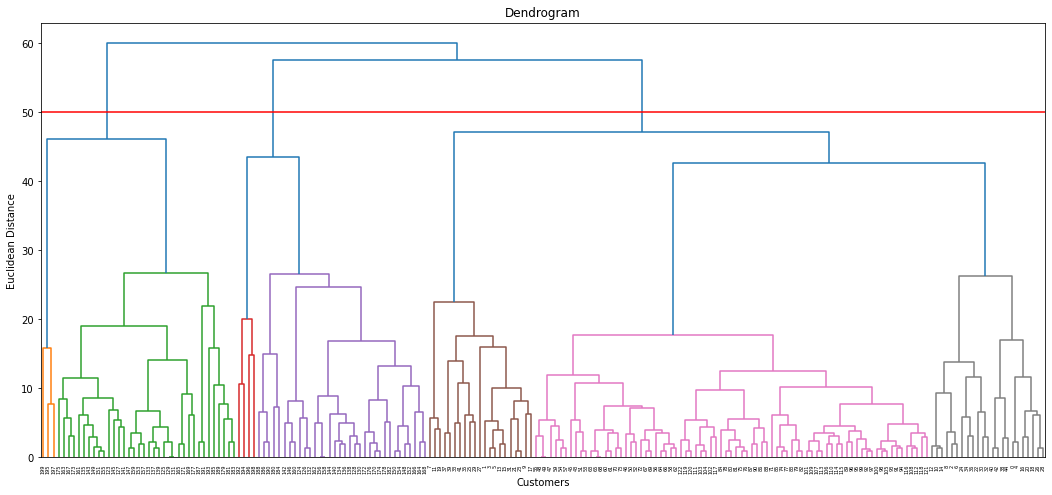

In [21]:
plt.figure(figsize=(18,8))

dendrogram = hierarchy.dendrogram(hierarchy.linkage(X,'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(50,color='red')
plt.show()

In [55]:
#train the model

tuned_clustering = KMeans(n_clusters=5, init='k-means++', random_state=0)

label = tuned_clustering.fit_predict(X)

In [56]:
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [57]:
from sklearn import metrics
from sklearn.metrics import silhouette_score 

In [58]:
silhouette_score(X, tuned_clustering.labels_, metric='euclidean')

0.553931997444648

# Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [60]:
clustering_model = AgglomerativeClustering(n_clusters=5,affinity='euclidean')

In [61]:
clustering_model.fit(X)

AgglomerativeClustering(n_clusters=5)

In [62]:
clustering_prediction = clustering_model.fit_predict(X)

In [63]:
clustering_prediction

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [64]:
metrics.silhouette_score(X, clustering_prediction, metric='euclidean')

0.5529945955148897

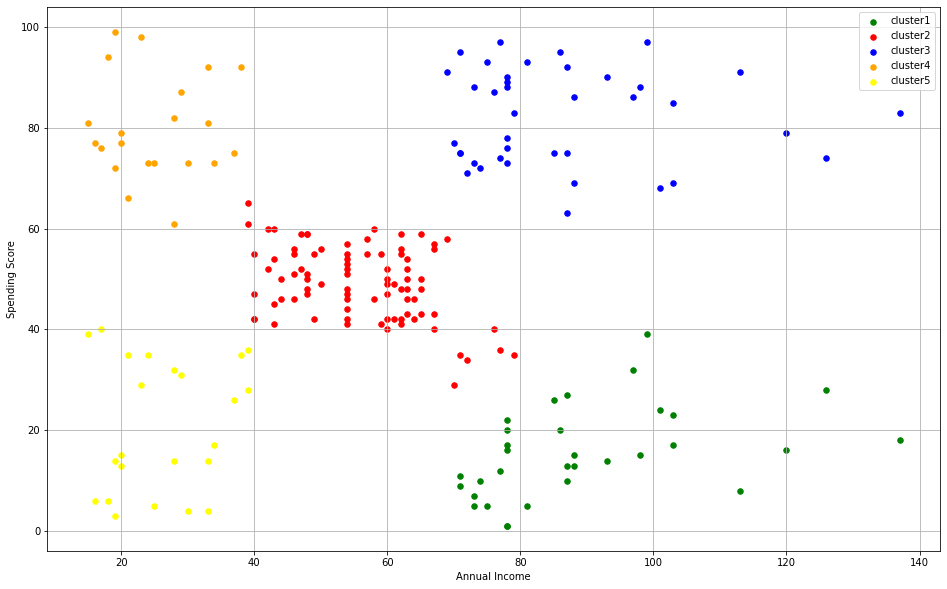

In [70]:
plt.figure(figsize=(16,10))
plt.scatter(X[clustering_prediction==0,0],
            X[clustering_prediction==0,1], s=30, c='green',
           label='cluster1')


plt.scatter(X[clustering_prediction==1,0],
            X[clustering_prediction==1,1], s=30, 
            c='red',label='cluster2')

plt.scatter(X[clustering_prediction==2,0], 
            X[clustering_prediction==2,1], s=30, 
            c='blue',label='cluster3')

plt.scatter(X[clustering_prediction==3,0], 
            X[clustering_prediction==3,1], s=30, 
            c='orange',label='cluster4')

plt.scatter(X[clustering_prediction==4,0], 
            X[clustering_prediction==4,1], s=30, 
            c='yellow',label='cluster5')


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# DBSCAN

In [68]:
from sklearn.cluster import DBSCAN


In [ ]:
# X = df.iloc[:,[2,3]].values
X = df[['Annual_Income_(k$)','Spending_Score']].values

In [ ]:
clustering_model = DBSCAN(eps=9, min_samples=5)

In [ ]:
clustering_model.fit(X)

In [71]:
predict_labels = clustering_model.labels_ 


In [72]:
predict_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

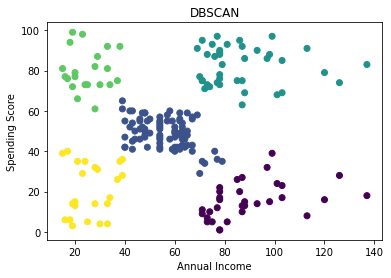

In [74]:
plt.scatter(X[:,0], X[:,1], c=predict_labels)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN')

plt.show()